In [1]:
import mcstasscript as ms
import make_powder_instrument
from mcstasutils import plot
import quizlib

In [2]:
quiz = quizlib.Powder_Quiz()

# Powder diffraction exercise

In this notebook you will work with a McStas model of a simplified powder diffraction instrument.
You will have to answer questions in the notebook by working with this model, both by running simulations and expanding the model.
We will use the Python McStas API McStasScript to work with the instrument, you can find documentation [here](https://mads-bertelsen.github.io).

## Get the instrument object
First we need the McStas instrument object. Here it is retrieved from a local python function that generates it.

In [3]:
instrument = make_powder_instrument.make()

['sample_Si', 'sample_2', 'sample_Vanadium', 'sample_Fe']
0 sample_Si
1 sample_2
2 sample_Vanadium
3 sample_Fe


## Investigate instrument
The first task is to investigate the instrument object `instrument` using some of the available methods available on that object. Each method that show something about the instrument starts with the word show, so you can use tab to autocomplete in the cell to see the relevant methods.

In particular, look at what parameters are available and take a look at the instrument geometry.

In [4]:
instrument.show_parameters()

       l_min                      = 0.5          // Minimum simulated 
                                                     wavelength [AA] 
       l_max                      = 4.0          // Maximum simulated 
                                                     wavelength [AA] 
int    n_pulses                   = 1            // Number of simulated pulses
       guide_curve_deg            = 1.0          // 
       chopper_wavelength_center  = 2.5          // Center of wavelength band 
                                                     [AA] 
double frequency_multiplier       = 1            // [1] Chopper frequency as 
                                                     multiple of source frequency 
       detector_height            = 2.5          // 
       sample_radius              = 0.01         // 
       sample_height              = 0.05         // 
string sample_choice              = "sample_Si"  // 


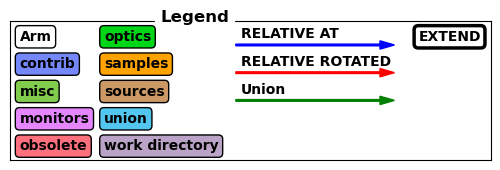

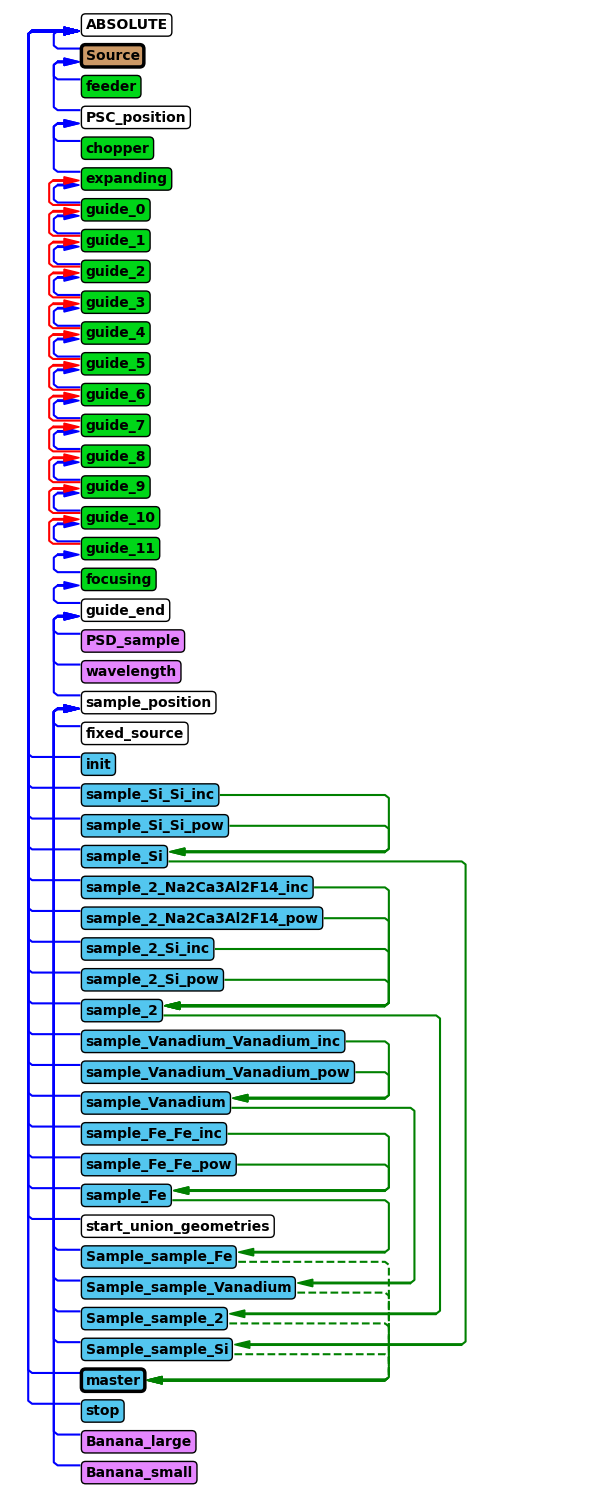

In [5]:
# instrument.show_instrument(format='window')
instrument.show_diagram()

### Question 1
Question about what is going on in the instrument model, checking for example how many choppers there are

### Run basic instrument for Si sample
Run without pulse shaping chopper

In [6]:
instrument.get_component("chopper").set_WHEN("frequency_multiplier!=0") # code to remove chopper

instrument.set_parameters(sample_choice='"sample_Si"', frequency_multiplier=0, guide_curve_deg=0, detector_height=1.5)
instrument.settings(ncount=5.0e8, mpi=4, suppress_output=False, NeXus=True, output_path="powder_Si_initial")

In [7]:
instrument.settings(mpi=2)

In [7]:
data_initial = instrument.backengine()

---- Found 5 places in McStas output with keyword 'error'. 

ERROR: syntax error at line 259.
----------------------------------------------------------------------
mcstas: 1 Errors encountered during parse of powder.instr.
        INFO: call to /home/nvaytet/miniforge3/envs/summerschool/bin/mcstas failed with Command '/home/nvaytet/miniforge3/envs/summerschool/bin/mcstas -t -o ./powder.c powder.instr' returned non-zero exit status 1.
Traceback (most recent call last):
  File "/home/nvaytet/miniforge3/envs/summerschool/share/mcstas/tools/Python/mcrun/mcrun.py", line 616, in <module>
    main()
  File "/home/nvaytet/miniforge3/envs/summerschool/share/mcstas/tools/Python/mcrun/mcrun.py", line 524, in main
    mcstas.prepare(options)
  File "/home/nvaytet/miniforge3/envs/summerschool/share/mcstas/tools/Python/mcrun/mccode.py", line 157, in prepare
    Process(mccode_bin_abspath).run(['-t', '-o', self.cpath, self.path])
  File "/home/nvaytet/miniforge3/envs/summerschool/share/mcstas/tools/

/home/nvaytet/miniforge3/envs/summerschool/lib/python3.12/site-packages/mcstasscript/helper/managed_mcrun.py:299: UserWarning: Simulation did not create data folder, most likely failed.
  warnings.warn("Simulation did not create data folder, most likely failed.")
/home/nvaytet/miniforge3/envs/summerschool/lib/python3.12/site-packages/mcstasscript/helper/managed_mcrun.py:327: UserWarning: No data available to load.
  warnings.warn("No data available to load.")


In [ ]:
plot(data_initial, orders_of_mag=5)

## Add a chopper

In [ ]:
instrument.set_parameters(frequency_multiplier=1)
instrument.settings(output_path="powder_Si_with_chopper")

In [ ]:
data_with_chopper = instrument.backengine()

In [ ]:
plot(data_with_chopper, orders_of_mag=5)

### High-resolution chopper

In [ ]:
instrument.set_parameters(frequency_multiplier=3)
instrument.settings(output_path="powder_Si_high_resolution")

In [ ]:
data_high_res = instrument.backengine()

In [ ]:
plot(data_high_res, orders_of_mag=5)

## Run second (unknown) sample

In [ ]:
instrument.set_parameters(sample_choice='"sample_2"')
instrument.settings(output_path="powder_sample_2")

data_sample_2 = instrument.backengine()

In [ ]:
plot(data_sample_2, orders_of_mag=5)

## Run Vanadium sample

In [ ]:
instrument.set_parameters(sample_choice='"sample_vanadium"')
instrument.settings(output_path="powder_vanadium")

data_vanadium = instrument.backengine()

In [ ]:
plot(data_vanadium, orders_of_mag=5)